# MELBOURNE PARKING DATA ANALYTICS

## 1.0 DATA PRE PROCESSING


### 1.1 Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

parkingDB = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")


### 1.1 Column Modifications

1.1.1 HEADINGS

In [3]:
#renaming code
parkingDB = parkingDB.rename(columns={'Area Name':'Area', 'Street Name':'Street', 'Duration of Parking Event (in seconds)':'Parking Duration (s)', 'Between Street 1':'Street Limit 1','Between Street 2':'Street Limit 2', 'In Violation?': 'Violation' })

#explanation
print("\u0332".join("Renamed Columns"))
print("Area Name --> Area")
print("Street Name --> Street")
print("Duration of Parking Event (in seconds) --> Parking Duration (s)")
print("Between Street 1 --> Street Limit 1")
print("Between Street 2 --> Street Limit 2")
print("In Violation? --> Violation")
print("\nnote: all other column names remained constant")

R̲e̲n̲a̲m̲e̲d̲ ̲C̲o̲l̲u̲m̲n̲s
Area Name --> Area
Street Name --> Street
Duration of Parking Event (in seconds) --> Parking Duration (s)
Between Street 1 --> Street Limit 1
Between Street 2 --> Street Limit 2
In Violation? --> Violation

note: all other column names remained constant


1.1.2 COLUMN DELETION

In [4]:
#Comparing 'Street' to 'Street ID'
print("\u0332".join("Checking Street Entries"))
print('Number of Entries in \'Column Street\': ', parkingDB['Street'].unique().size)
print('Number of Entries in \'Street ID\':  ', parkingDB['Street ID'].unique().size)
print("\nThe number of Street ID's against the Column Street entries are equal. This means that the street ID will match up with one street name present in the former column.")
print("\nBoth entries will be kept for the time being since the ID can be used to determine the street name later on. This is useful as the the Street name will not have to be transformed to a numerical value.")

C̲h̲e̲c̲k̲i̲n̲g̲ ̲S̲t̲r̲e̲e̲t̲ ̲E̲n̲t̲r̲i̲e̲s
Number of Entries in 'Column Street':  75
Number of Entries in 'Street ID':   75

The number of Street ID's against the Column Street entries are equal. This means that the street ID will match up with one street name present in the former column.

Both entries will be kept for the time being since the ID can be used to determine the street name later on. This is useful as the the Street name will not have to be transformed to a numerical value.


1.1.3 UNIQUE IDENTIFIER CHECK

In [5]:
print("This section will check for unique values in columns of interest, find outliers and possible mistakes. \n")
print('Unique Entries in \'Area\' ', parkingDB['Area'].unique(), '\n')
print('Unique Entries in \'Street\' ', parkingDB['Street'].unique(), '\n')
print('Unique Entries in \'Side of Street\' ', parkingDB['Side Of Street'].unique(), '\n')
print('Unique Entries in \'Device ID\' ', parkingDB['Device ID'].unique().size, '\n')
print('Unique Entries in \'Sign\' ', parkingDB['Sign'].unique().size, '\n')
print("The values for Device ID indicate that the dataset has multiple events for the same car, and so using this to determine rates wtih repeating visits will be useful in the analysis")

This section will check for unique values in columns of interest, find outliers and possible mistakes. 

Unique Entries in 'Area'  ['Banks' 'Chinatown' 'Courtney' 'Princes Theatre' 'Hyatt' 'County' 'RACV'
 'Spencer' 'City Square' 'The Mac' 'Titles' 'Magistrates' 'Rialto'
 'Queensberry' 'Victoria Market' 'Supreme' 'Hardware' 'Regency'
 'Docklands' 'Tavistock' 'Southbank' 'West Melbourne' 'Jolimont'] 

Unique Entries in 'Street'  ['MARKET STREET' 'RUSSELL STREET' 'ELIZABETH STREET' 'EXHIBITION STREET'
 'LONSDALE STREET' 'Lt COLLINS STREET' 'BOURKE STREET' 'FLINDERS LANE'
 'SPRING STREET' 'COLLINS STREET' 'Lt LONSDALE STREET' "A'BECKETT STREET"
 'Lt BOURKE STREET' 'KING STREET' 'ERROL STREET' 'FRANKLIN STREET'
 'Lt DRYBURGH STREET SOUTH' 'WILLIAM STREET' 'WILLS STREET'
 'SPENCER STREET' 'FLINDERS STREET' 'THERRY STREET' 'QUEEN STREET'
 'LEVESON STREET' "O'CONNELL STREET" 'CHETWYND STREET' 'WALSH STREET'
 'ANDERSON STREET' 'ROSSLYN STREET' 'LA TROBE STREET' 'BOND STREET'
 'CAPEL STREET' 'C

1.1.4 NULL ROWS CHECK

In [6]:
print("This section will check for rows with less than 50% of columns filled. Rows that qualify under this definition will be deleted so as to not tamper with results.")
print('Number of Rows Before Row Deletion: ', parkingDB.shape[0])
parkingDB.dropna(axis = 0, thresh = 6, inplace = True)
print('Number of Rows After Row Deletion: ', parkingDB.shape[0])



This section will check for rows with less than 50% of columns filled. Rows that qualify under this definition will be deleted so as to not tamper with results.
Number of Rows Before Row Deletion:  12208178
Number of Rows After Row Deletion:  12208178


In [7]:
print("Now that we have removed problematic row entries in the database, we will perform a null search to see if there are any other null values present.")
print("\nNull Values Present in Each Column:")
print(parkingDB.isnull().sum())
print("\nThere are no null values within the database after cleaning columns with more than 50% of data missing.")

Now that we have removed problematic row entries in the database, we will perform a null search to see if there are any other null values present.

Null Values Present in Each Column:
Area                    0
Street                  0
Street Limit 1          0
Street Limit 2          0
Side Of Street          0
Street Marker           0
Arrival Time            0
Departure Time          0
Parking Duration (s)    0
Sign                    0
Violation               0
Street ID               0
Device ID               0
dtype: int64

There are no null values within the database after cleaning columns with more than 50% of data missing.


1.1.5 DATA TRANSFORMATION

## 2.0 DATA EXPLORATION

### 2.1 NUMBERS OF PAKING EVENTS IN AREAS

Text(0.5, 0, "Count (1000,000's)")

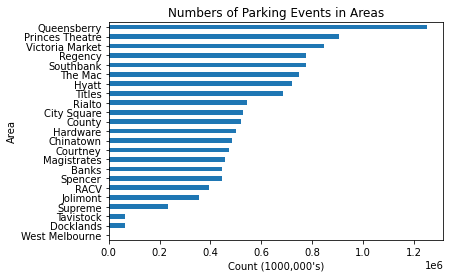

In [8]:
parkingDB['Area'].value_counts().sort_values().plot.barh()
plt.title('Numbers of Parking Events in Areas')
plt.ylabel('Area')
plt.xlabel("Count (1000,000's)")

### 2.2 NUMBERS OF INFRINGEMENTS IN AREAS

Text(0.5, 0, 'Count')

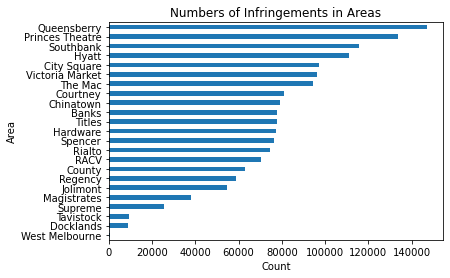

In [9]:
mask_violation = parkingDB['Violation'] == 1
parkingDB.loc[mask_violation, 'Area'].value_counts().sort_values().plot.barh()
plt.title('Numbers of Infringements in Areas')
plt.ylabel('Area')
plt.xlabel("Count")

### 2.3 INFRINGEMENT RATES IN AREAS

Text(0.5, 0, 'Infringement Rate')

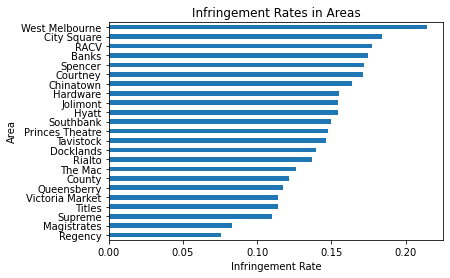

In [10]:
areas = parkingDB['Area'].value_counts()
violations = parkingDB.loc[mask_violation, 'Area'].value_counts()
areas = areas.astype(float)
violations = violations.astype(float)/areas
violations.sort_values().plot.barh()
plt.title('Infringement Rates in Areas')
plt.ylabel('Area')
plt.xlabel("Infringement Rate")

### 2.4 Street vs Number of Violations

Text(0.5, 0, 'Count')

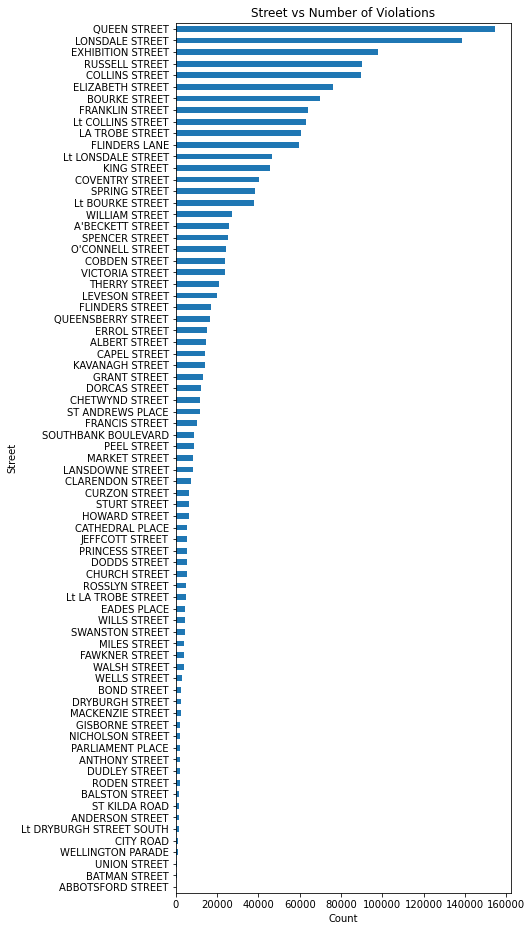

In [11]:
mask_violation = parkingDB['Violation'] == 1
plt.figure(figsize=(6,16))
parkingDB.loc[mask_violation, 'Street'].value_counts().sort_values().plot.barh()
plt.title('Street vs Number of Violations')
plt.ylabel('Street')
plt.xlabel("Count")

### 2.5 Number of Street Signs for each road

In [12]:
parkingDB.head()

,Area,Street,Street Limit 1,Street Limit 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Parking Duration (s),Sign,Violation,Street ID,Device ID
0,Banks,MARKET STREET,FLINDERS LANE,FLINDERS STREET,5,1263W,01/10/2011 12:01:10 AM,01/10/2011 12:02:44 AM,94,2P DIS M-SUN 0:00-23:59,0,957,1667
1,Chinatown,RUSSELL STREET,BOURKE STREET,Lt COLLINS STREET,2,742E,01/10/2011 12:01:11 AM,01/10/2011 03:58:20 AM,14229,4P DIS AOT 12:00-7:30,0,1221,525
2,Courtney,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,01/10/2011 12:01:11 AM,01/10/2011 11:00:19 AM,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
3,Princes Theatre,EXHIBITION STREET,Lt BOURKE STREET,BOURKE STREET,2,452E,01/10/2011 12:01:13 AM,01/10/2011 12:37:42 AM,2189,2P DIS M-SUN 0:00-23:59,0,647,201
4,Princes Theatre,EXHIBITION STREET,BOURKE STREET,Lt COLLINS STREET,5,429W,01/10/2011 12:01:14 AM,01/10/2011 05:28:10 AM,19616,TKT AREA M-SUN 0:00 - 7:30,0,647,176


Text(0.5, 1.0, 'Number of Street Signs for each road')

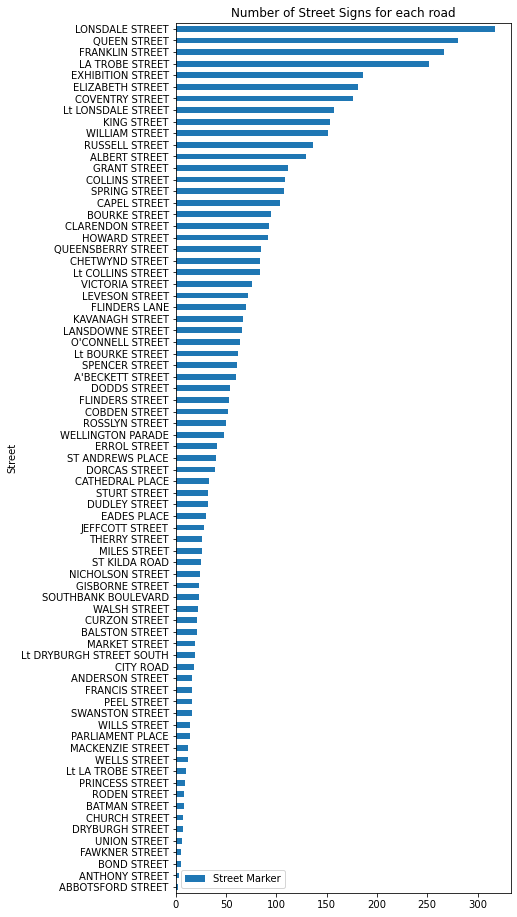

In [13]:
df = parkingDB.groupby('Street')
df = df.agg({'Street Marker':'nunique'}).sort_values(by='Street Marker')
df.plot.barh(figsize=(6, 16))
plt.title('Number of Street Signs for each road')

### 2.6 How many streets are in each area

Text(0.5, 1.0, 'How many streets are in each area')

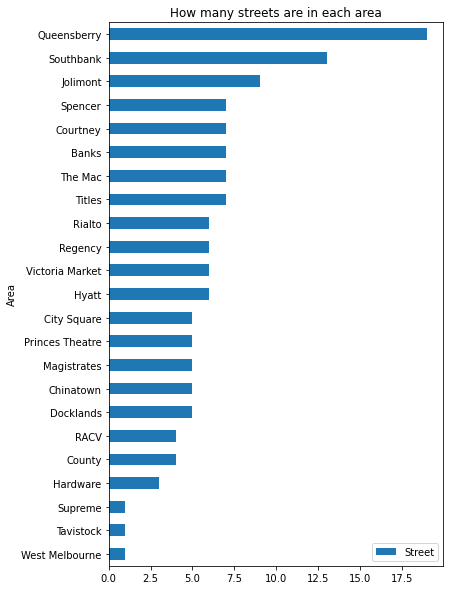

In [14]:
df = parkingDB.groupby('Area')
df = df.agg({'Street':'nunique'}).sort_values(by='Street')
df.plot.barh(figsize=(6, 10))
plt.title('How many streets are in each area')

Text(0, 0.5, 'Street')

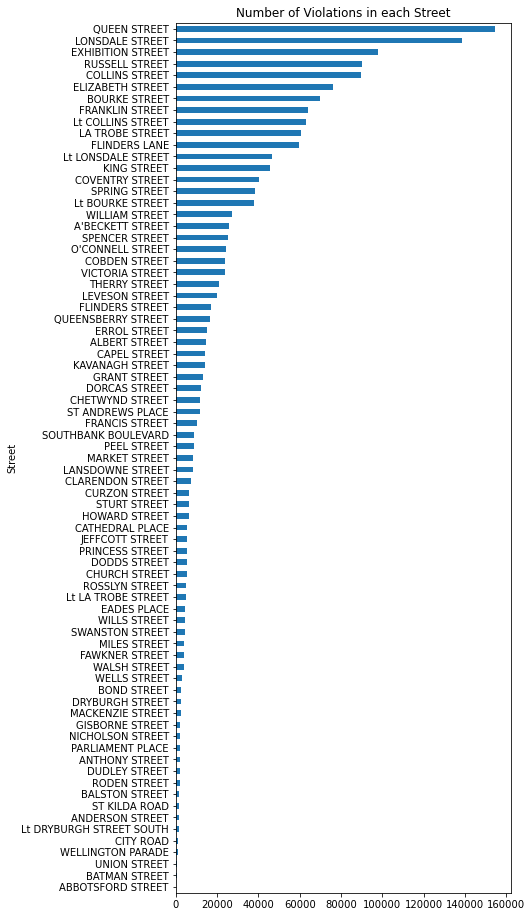

In [15]:
mask_violation = parkingDB['Violation'] == 1
plt.figure(figsize=(6,16))
parkingDB.loc[mask_violation, 'Street'].value_counts().sort_values().plot.barh()
plt.title('Number of Violations in each Street')
plt.ylabel('Street')

### 2.7 Parking duration vs Violation

### 2.8 Parking Duration vs Side of Street

### 2.9 Departure time vs Duration

### 2.10 Arrival Time vs Duration

### 2.11 Parking Duration Distribution

Text(0.5, 0, 'Duration (s)')

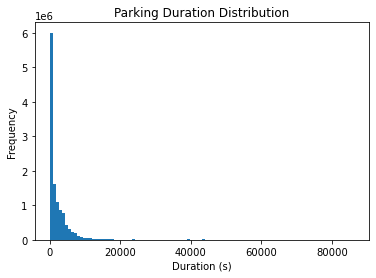

In [16]:
parkingDB['Parking Duration (s)'].plot(kind='hist', bins=100)
plt.title('Parking Duration Distribution')
plt.xlabel('Duration (s)')

### 2.12 Parking Duration Distribution vs Area

<AxesSubplot:title={'center':'Parking Duration (s)'}, xlabel='Area'>

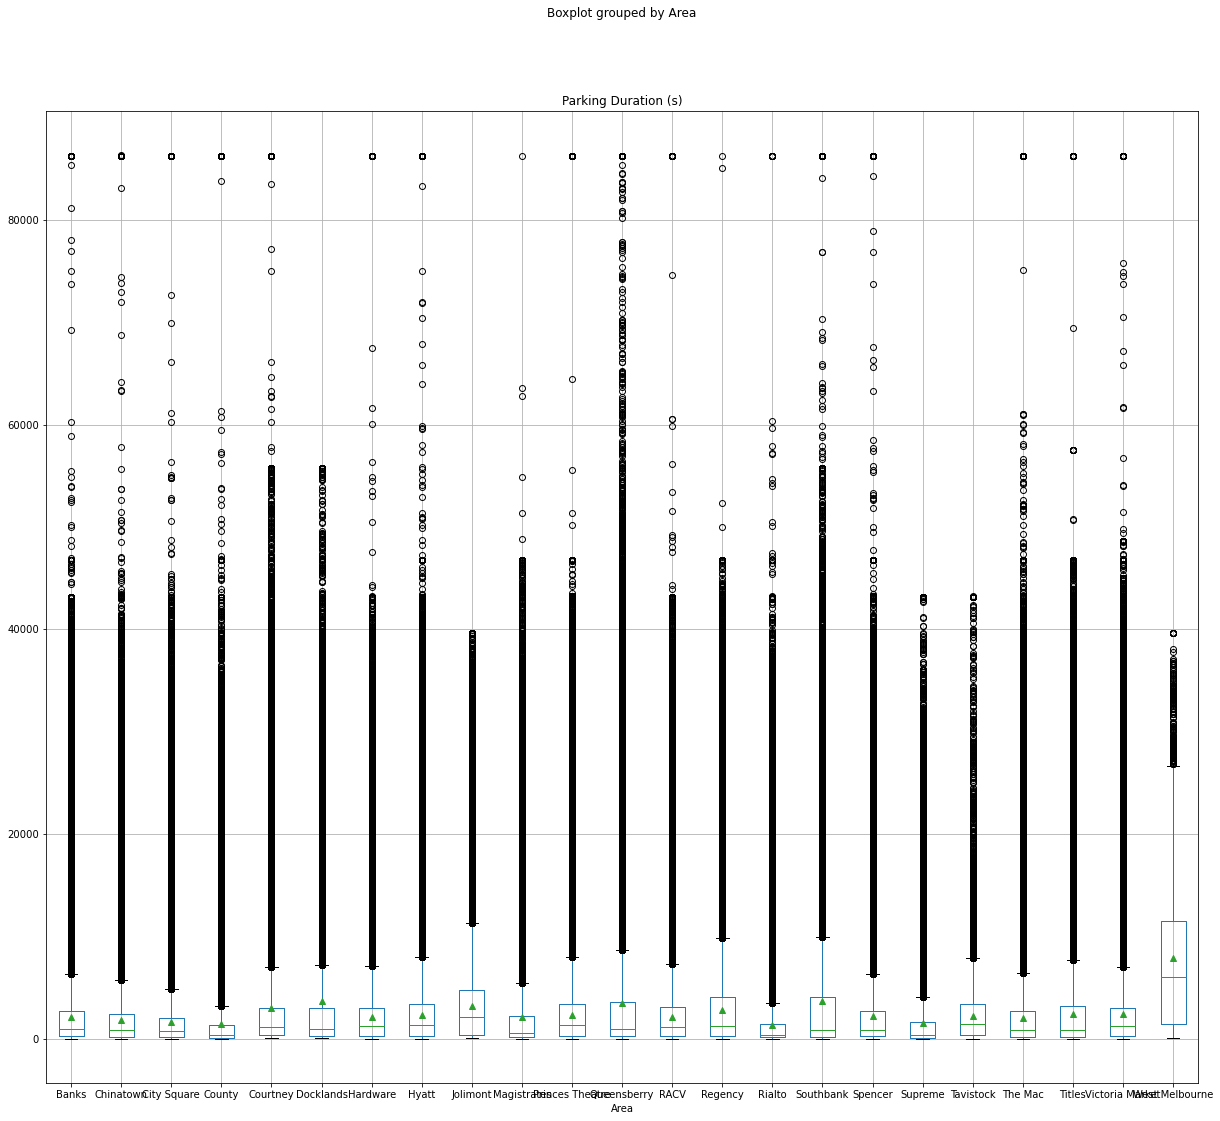

In [25]:
from matplotlib.pyplot import figure
parkingDB.boxplot(figsize=(20, 18), column='Parking Duration (s)', by='Area', grid=True, showmeans=True)